<a href="https://colab.research.google.com/github/AdrianGuel/ExploringNonLinearParIdentification/blob/main/NLparameterestimationGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygad
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 786 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 4.4 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=c2ff08cfc2d3bfca5eb5d657ce66a8e30c21f1d264f7e04a004e885b9eb946f8
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


In [ ]:
#Get the "real/experimental" data
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pend(y, t, b, c):
    return np.array([y[1], -b*y[1] - c*np.sin(y[0])])

b = 0.25
c = 5.0
y0 = np.array([np.pi - 0.1, 0.0])
t = np.linspace(0, 10, 101)

data = odeint(pend, y0, t, args=(b, c))

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


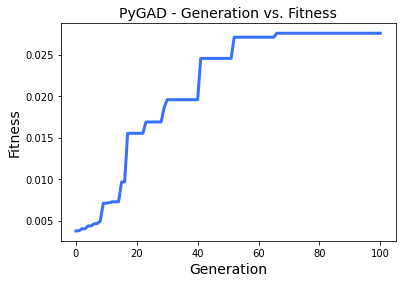

Parameters of the best solution : [1.97156979 2.03270006 0.30001413 4.18996576]
Fitness value of the best solution = 0.027566970466007357


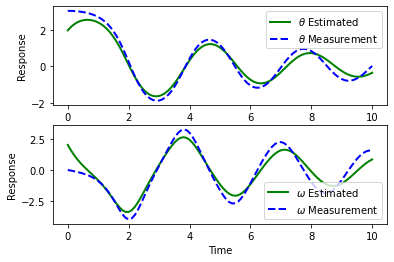

In [ ]:
import pygad
import numpy
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy as np

desired_output = 0

def fitness_func(solution, solution_idx):
    y0 = np.array([solution[0], solution[1]])
    y = odeint(pend, y0, t, args=(solution[2], solution[3]))
    output = 0.5*LA.norm(data-y)**2+0.5*LA.norm(solution)**2
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100
num_parents_mating = 6

sol_per_pop = 8
num_genes = 4

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()
ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

y0 = np.array([solution[0], solution[1]])
y = odeint(pend, y0, t, args=(solution[2], solution[3]))
fig, axs = plt.subplots(2, 1)
axs[0].plot(t,y[:,0],color="green",lw=2,label="$\\theta$ Estimated")
axs[0].plot(t,data[:,0],color="blue",linestyle='--',lw=2,label="$\\theta$ Measurement")
axs[0].legend()
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Response')
axs[1].plot(t,y[:,1],color="green",lw=2,label="$\omega$ Estimated")
axs[1].plot(t,data[:,1],color="blue",linestyle='--',lw=2,label="$\omega$ Measurement")
axs[1].legend()
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Response')
plt.show()